# Basic example

In order to compute the covariance for some tracers you need:
 - a configuration file in YAML format or a dictionary
 - to use the `tjpcov.covariance_calculator.CovarianceCalculator` class
 
The `CovarianceCalculator` class will read all the covariance terms that you request (e.g. Gaussian and SSC) and compute them. It will also allow you to create a sacc file.

In [1]:
from tjpcov.covariance_calculator import CovarianceCalculator
from matplotlib import pyplot as plt
import numpy as np

# In order to use the config file in tests, you need your working directory to be the root folder
%cd ../
config_yml = 'tests/data/conf_covariance_calculator.yml'
cc = CovarianceCalculator(config_yml)

Computing independent covariance blocks
Computing the blocks for independent workspaces
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESgc__0')
Loading saved covariance tests/tmp/cov_DESgc__0_DESgc__0_DESgc__0_DESgc__0.npz
('DESgc__0', 'DESwl__0') ('DESgc__0', 'DESwl__0')
Loading saved covariance tests/tmp/cov_DESgc__0_DESwl__0_DESgc__0_DESwl__0.npz
('DESgc__0', 'DESwl__1') ('DESgc__0', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESgc__0_DESwl__1_DESgc__0_DESwl__1.npz
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__0')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__0_DESwl__0_DESwl__0.npz
('DESwl__0', 'DESwl__1') ('DESwl__0', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__1_DESwl__0_DESwl__1.npz
('DESwl__1', 'DESwl__1') ('DESwl__1', 'DESwl__1')
Loading saved covariance tests/tmp/cov_DESwl__1_DESwl__1_DESwl__1_DESwl__1.npz
Computing the blocks for independent covariance workspaces
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__0')
Loading saved covariance test

/home/ardok/.local/lib/python3.10/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


Computing independent covariance blocks
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESgc__0')
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__0')
('DESgc__0', 'DESgc__0') ('DESgc__0', 'DESwl__1')
('DESgc__0', 'DESgc__0') ('DESwl__0', 'DESwl__0')
('DESgc__0', 'DESgc__0') ('DESwl__0', 'DESwl__1')
('DESgc__0', 'DESgc__0') ('DESwl__1', 'DESwl__1')
('DESgc__0', 'DESwl__0') ('DESgc__0', 'DESwl__0')
('DESgc__0', 'DESwl__0') ('DESgc__0', 'DESwl__1')
('DESgc__0', 'DESwl__0') ('DESwl__0', 'DESwl__0')
('DESgc__0', 'DESwl__0') ('DESwl__0', 'DESwl__1')
('DESgc__0', 'DESwl__0') ('DESwl__1', 'DESwl__1')
('DESgc__0', 'DESwl__1') ('DESgc__0', 'DESwl__1')
('DESgc__0', 'DESwl__1') ('DESwl__0', 'DESwl__0')
('DESgc__0', 'DESwl__1') ('DESwl__0', 'DESwl__1')
('DESgc__0', 'DESwl__1') ('DESwl__1', 'DESwl__1')
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__0')
('DESwl__0', 'DESwl__0') ('DESwl__0', 'DESwl__1')
('DESwl__0', 'DESwl__0') ('DESwl__1', 'DESwl__1')
('DESwl__0', 'DESwl__1') ('DESwl__0', 'DESwl__1')
('DESwl__0

/tmp/ipykernel_90307/267680187.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(cov)))


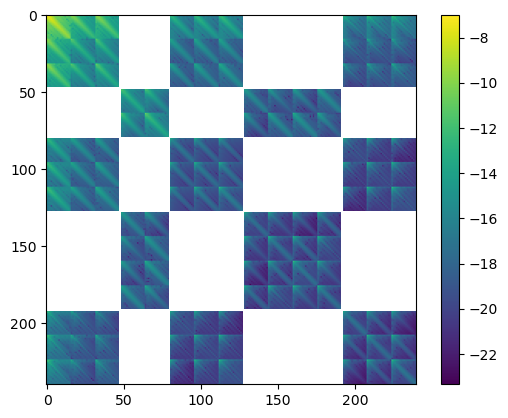

In [2]:
# You can get the total covariance:
cov = cc.get_covariance();

plt.imshow(np.log10(np.abs(cov)))
plt.colorbar()
plt.show()

/home/ardok/.local/lib/python3.10/site-packages/tjpcov/covariance_io.py:93: UserWarning: Output file tests/tmp/cls_cov.fits already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(
/home/ardok/.local/lib/python3.10/site-packages/tjpcov/covariance_io.py:93: UserWarning: Output file tests/tmp/cls_cov_gauss.fits already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(
/home/ardok/.local/lib/python3.10/site-packages/tjpcov/covariance_io.py:93: UserWarning: Output file tests/tmp/cls_cov_SSC.fits already exists. Appending the UTC time to the filename to avoid losing the covariance computation. Writing sacc file to {output_new}
  warnings.warn(


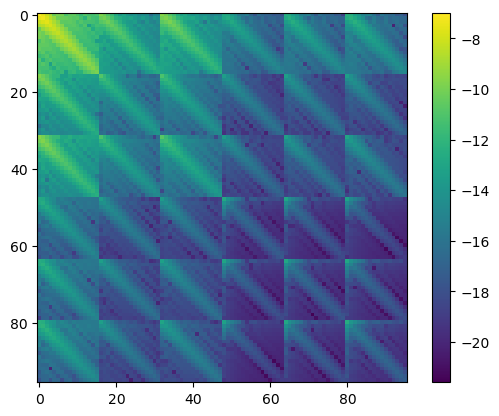

In [3]:
# Or you can get the sacc file with the total covariance:
s = cc.create_sacc_cov()

ix = np.concatenate([s.indices(data_type='cl_00'),
                     s.indices(data_type='cl_0e'),
                     s.indices(data_type='cl_ee')])

plt.imshow(np.log10(np.abs(s.covariance.covmat[ix][:, ix])))
plt.colorbar()
plt.show()

/tmp/ipykernel_90307/2055833993.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(cov)))


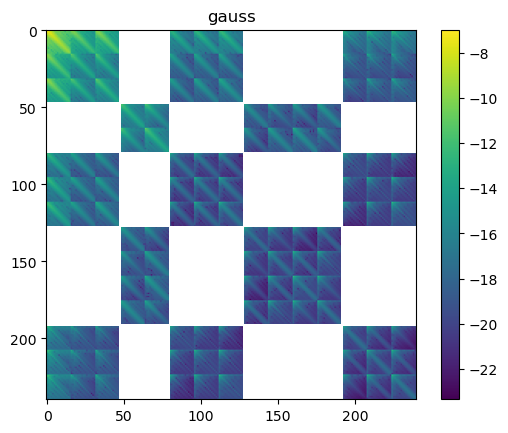

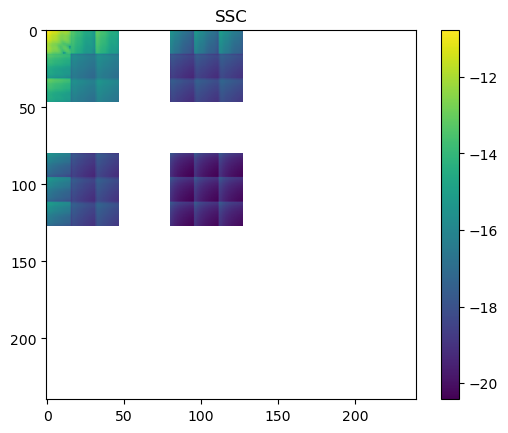

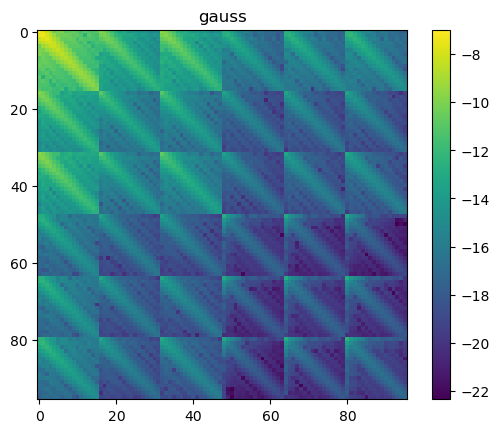

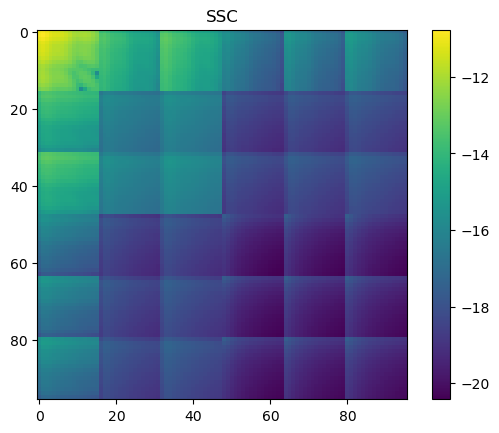

In [4]:
# You can also get the covariance terms (Gaussian, SSC, ...) independently
covs = cc.get_covariance_terms()

for term, cov in covs.items():
    plt.imshow(np.log10(np.abs(cov)))
    plt.colorbar()
    plt.title(term)
    plt.show()
    
# Plotting only the 00, 0e and ee modes
for term, cov in covs.items():
    plt.imshow(np.log10(np.abs(cov[ix][:, ix])))
    plt.colorbar()
    plt.title(term)
    plt.show()

Loading saved covariance tests/tmp/cov_DESwl__0_DESwl__0_DESwl__0_DESwl__0.npz


/home/ardok/.local/lib/python3.10/site-packages/sacc/sacc.py:378: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "
/tmp/ipykernel_90307/963281329.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(cov_class[('cl', 'cl')].get_covariance_block_for_sacc(trs, trs))))


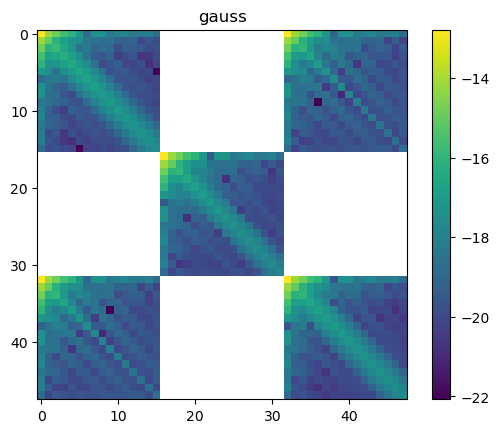

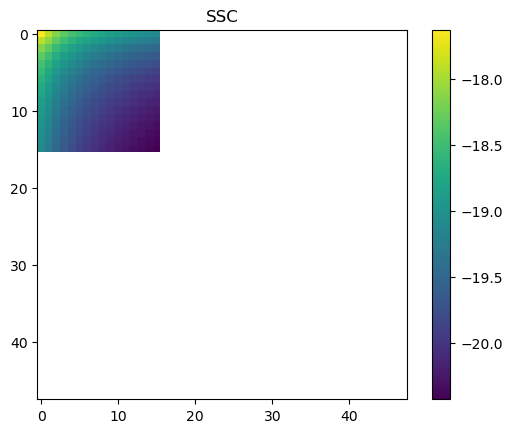

In [5]:
# Or you can also get the covariance term classes (Gaussian, SSC, ...) independently
# to work with them at a lower level (not recomended)
covs = cc.get_covariance_classes()

# Eg. let's compute only one of the blocks of the covariance for two tracers
trs = ("DESwl__0", "DESwl__0")
for term, cov_class in covs.items():
    plt.imshow(np.log10(np.abs(cov_class[('cl', 'cl')].get_covariance_block_for_sacc(trs, trs))))
    plt.colorbar()
    plt.title(term)
    plt.show()